In [96]:
#Importing Libraries required
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [103]:
#load the csv file into Pandas dataset
loan = pd.read_csv(r"H:\ML&DL\Lending_club_study\loan\loan.csv")
loan.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [98]:
#check datatype and shape of DS
print(loan.shape)
print(loan.info())
print(loan.dtypes)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


## <h2>Data Cleaning Stats<h2>

In [99]:
#Checking for Duplicate record 
loan.duplicated().sum()
#There are no duplicate records

0

In [100]:
#Checking for columns/rows with all null values

print("number of columns with all null values :",loan.isnull().all(axis=0).sum())
print("number of columns with all null values :",loan.isnull().all(axis=1).sum())

#Observation : No empty rows found but found 54 empty columns 

number of columns with all null values : 54
number of columns with all null values : 0


In [104]:
#drop the 54 columns having all null values 
loan_remove_col= list(loan.columns[loan.isnull().all(axis=0)])
loan.drop(loan_remove_col,axis=1,inplace=True)

In [105]:
#drop all the columns where most of the values is null or not requirement for Analysis
col_add_col_drop = ['desc','mths_since_last_delinq','mths_since_last_record','member_id','next_pymnt_d']
loan.drop(col_add_col_drop,axis=1,inplace=True)

col_add_col_drop1 = ['tax_liens','zip_code','url','emp_title','tax_liens']
loan.drop(col_add_col_drop1,axis=1,inplace=True)

In [106]:
#check for the columns having null values after removing empty column and not required one.
loan.columns[loan.isnull().sum()>0]

Index(['emp_length', 'title', 'revol_util', 'last_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies'],
      dtype='object')

In [107]:
#lets do missing value imputation and format the important column required for analysis
loan.emp_length.fillna('0',inplace=True)
loan['emp_length']=loan.emp_length.str.extract('(\d+)')
loan.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,...,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [108]:
#pub_rec_bankruptcies can be cleaned for further analysis.
print(loan.pub_rec_bankruptcies.isnull().sum())
print("After cleaning:")
loan.pub_rec_bankruptcies.fillna('Not Known',inplace=True)
print(loan.pub_rec_bankruptcies.isnull().sum())

697
After cleaning:
0


In [109]:
#remove # from interest rate and revol columns for calculation purpose
loan['int_rate'] = loan['int_rate'].str.rstrip('%')
loan['revol_util'] = loan['revol_util'].str.rstrip('%')

In [110]:
#convert amount columns into numeric data for calculation purpose
cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan[cols1] = loan[cols1].apply(pd.to_numeric)



In [111]:
#Checking the loan status share to a total loan issued
(loan.loan_status.value_counts())/len(loan)*100
#Observation : 
#82% Loan are fully pain 
#14% charged off 
#2% current

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [112]:
#Checking the loan status share to a total loan issued
loan.purpose.value_counts()/len(loan)*100
#Observation : 
# debt_consolidation and credit card loan have highest share 

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

<h2> Derive columns for Analysis : <h2>

In [113]:
#Creating derive column from issue date for analysis purpose
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month

loan.head(1)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,2011,12



<h2> Univarient Analysis : <h2>

In [114]:
#Checking basic Statistics with the help of describe and box plot - Quantitative Variables
loan['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

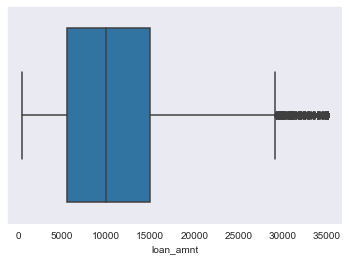

In [115]:
import seaborn as sns
sns.boxplot(loan.loan_amnt)

In [116]:
#Checking basic Statistics with the help of describe and box plot - Quantitative Variables
loan.total_pymnt.describe()

count    39717.000000
mean     12153.596544
std       9042.040766
min          0.000000
25%       5576.930000
50%       9899.640319
75%      16534.433040
max      58563.679930
Name: total_pymnt, dtype: float64

<AxesSubplot:xlabel='total_pymnt'>

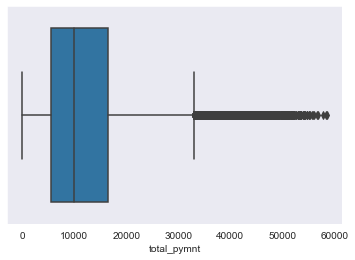

In [117]:
sns.boxplot(loan.total_pymnt)

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


<AxesSubplot:xlabel='annual_inc'>

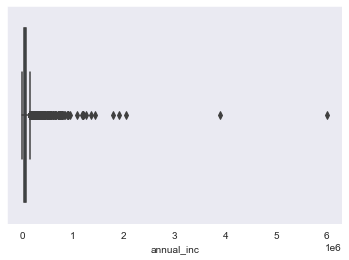

In [118]:
#Checking basic Statistics with the help of describe and box plot - Quantitative Variables
print(loan['annual_inc'].describe())
sns.boxplot(loan.annual_inc)

<h3> Outlier Treatment <h3>

In [119]:
#Required Outlier treatment hence removing values outside 99% percentile
loan = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.99)]

<AxesSubplot:xlabel='annual_inc'>

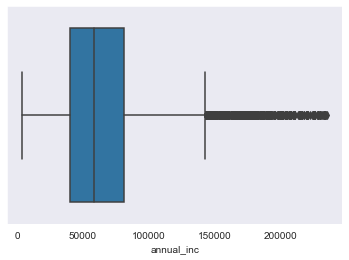

In [120]:
sns.boxplot(loan.annual_inc)

In [121]:
#Checking basic Statistics with the help of describe and box plot - Quantitative Variables
loan['int_rate'].describe()

# Average interest rate is 12%
# After 75th Percentile interest rate increcease from 14% to 25%

count    39319.000000
mean        12.006142
std          3.717367
min          5.420000
25%          9.250000
50%         11.830000
75%         14.540000
max         24.590000
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate'>

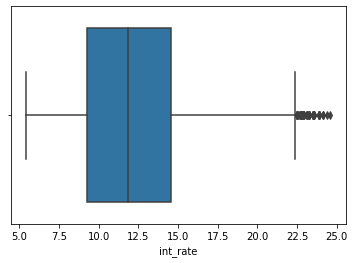

In [44]:
sns.boxplot(loan.int_rate)

In [122]:
# Data cleaning
# Drop additional columns which are not needed further in analysis.

columns_drop_list3 = ["application_type","policy_code","initial_list_status","installment","pymnt_plan"]
loan.drop(labels = columns_drop_list3, axis =1, inplace=True)
print(loan.shape)
loan.isnull().sum()

(39319, 45)


id                             0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
title                         11
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    49
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_

In [123]:
# Derived columns
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
loan['annual_inc_cats'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
loan['int_rate_cats'] = pd.cut(loan['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
loan['dti_cats'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])


In [124]:
print(loan.shape)
loan.head(1)

(39319, 49)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,year,month,loan_amnt_cats,annual_inc_cats,int_rate_cats,dti_cats
0,1077501,5000,5000,4975.0,36 months,10.65,B,B2,10,RENT,...,0,0.0,0,0.0,2011,12,0-7000,20000-40000,10-13,NaN


<h2>Univariant Analysis<h2>

Text(0.5, 1.0, 'Amount Funded')

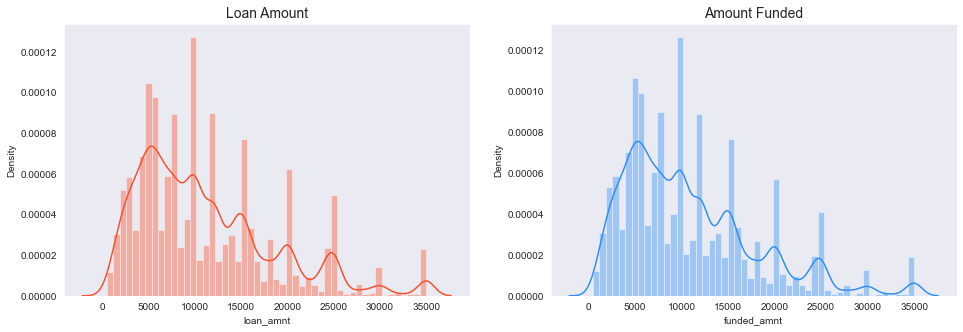

In [125]:
#Checking the distrubution of Loan and Funded amount
# Quantitative Variables

fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.distplot(loan['loan_amnt'], ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Amount", fontsize=14)
sns.distplot(loan['funded_amnt'], ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded", fontsize=14)

# Observation: 
# Distribution of amounts for all two looks very much similar.
# hence will work with only loan amount column for rest of our analysis.


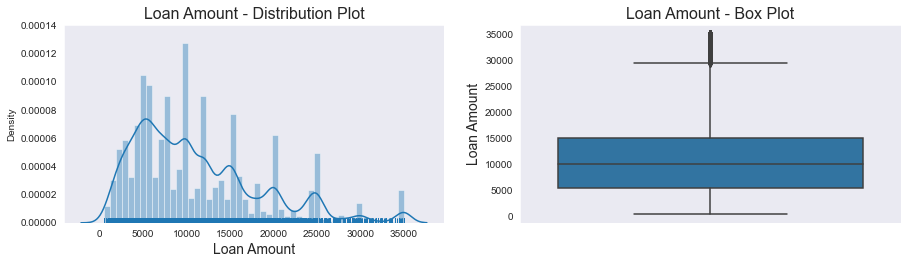

In [152]:
#Analysis on Loan amount-Quantitative Variables

plt.figure(figsize=(15,8))
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16)
ax.set_xlabel('Loan Amount',fontsize=14)
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16)
ax.set_ylabel('Loan Amount',fontsize=14)
plt.show()

# Observations :
# Below plots show that most of the Loan amounts are in range of 5000 - 15000

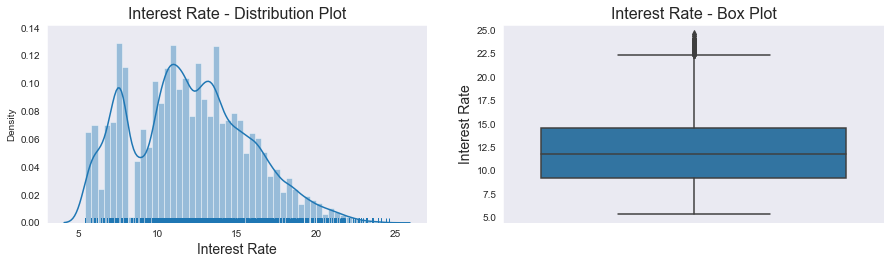

In [151]:
#Analysis on Interest Rate -Quantitative one
plt.figure(figsize=(15,8))
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16)
ax.set_xlabel('Interest Rate',fontsize=14)
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16)
ax.set_ylabel('Interest Rate',fontsize=14)
plt.show()

# Observations :
# Below plots show that most of the Interest Rates on loans are in range of 10% - 15%

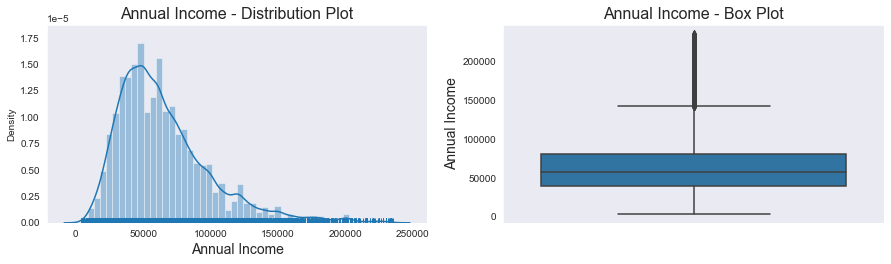

In [150]:
#Analysis on Annual Income -Quantitative one

plt.figure(figsize=(15,8))
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16)
ax.set_xlabel('Annual Income',fontsize=14)
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=loan['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16)
ax.set_ylabel('Annual Income',fontsize=14)
plt.show()

# Observations :
# Below plots show that most of the Annual incomes are in range of 40000- 80000


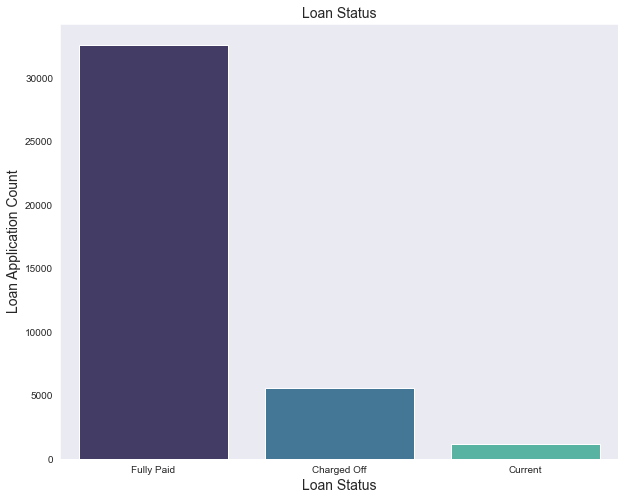

In [148]:
#UnOrdered Categorical Univariant Analysis on Loan status

plt.figure(figsize=(10,8))
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=loan,palette='mako')
ax.set_title('Loan Status',fontsize=14)
ax.set_xlabel('Loan Status',fontsize=14)
ax.set_ylabel('Loan Application Count',fontsize=14)            
# To show count of values above bars
s=loan['loan_status'].value_counts()

# Observations :
# Below plot shows that close to 14% loans were charged off out of total loan issued.

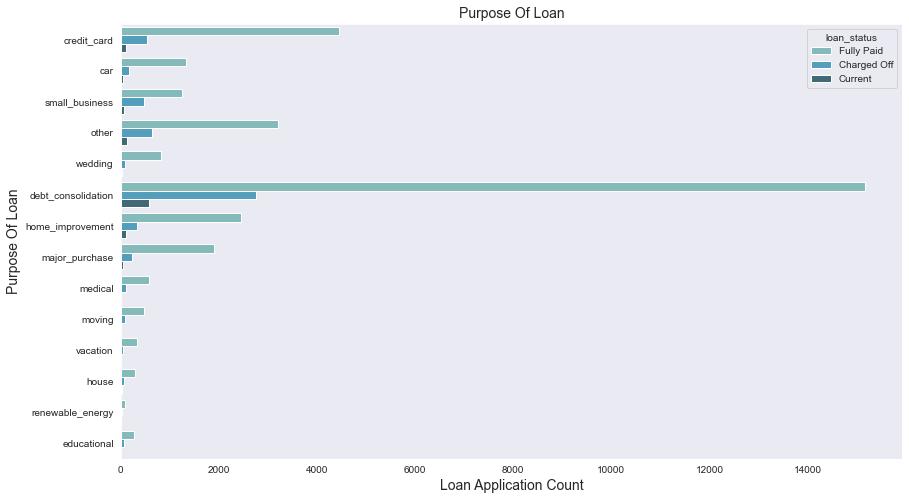

In [153]:
#UnOrdered Categorical Univariant Analysis on Loan Purpose
plt.figure(figsize=(14,8))
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=loan,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14)
ax.set_ylabel('Purpose Of Loan',fontsize=14)
ax.set_xlabel('Loan Application Count',fontsize=14)      
plt.show()
# Observations :
# Below plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
# Number of chraged off count also high too for these loans.

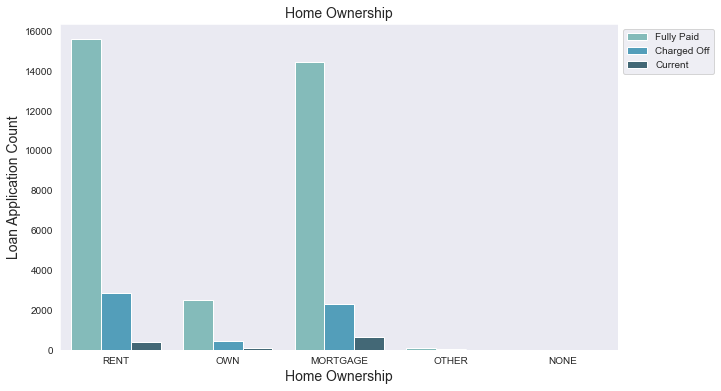

In [154]:
#UnOrdered Categorical Univariant Analysis on Home Ownership
plt.figure(figsize=(10,6))
ax = sns.countplot(x="home_ownership",data=loan,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14)
ax.set_xlabel('Home Ownership',fontsize=14)
ax.set_ylabel('Loan Application Count',fontsize=14)      
plt.show()
# Observations :
# Below plot shows that most of them living in rented home or mortgazed their home.
# Applicant numbers are high from these categories so charged off is high too.

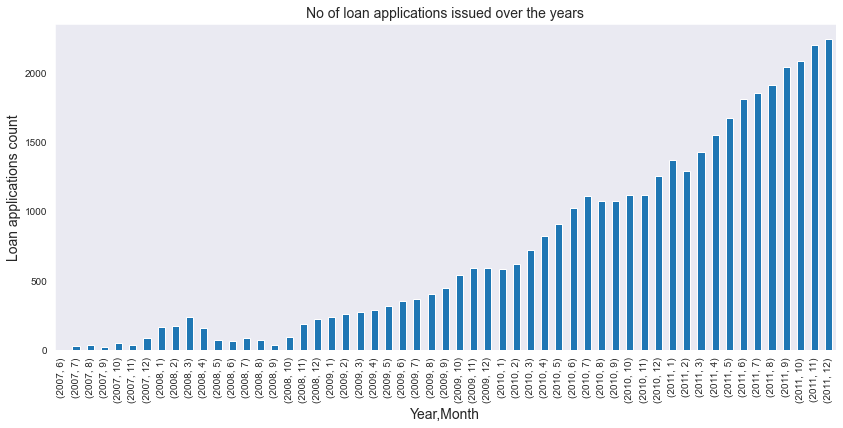

In [155]:
#Ordered Categorical Univariant Analysis on Derive Columns
plt.figure(figsize=(14,6))
loan.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14)
plt.xlabel('Year,Month',fontsize=14)      
plt.title("No of loan applications issued over the years",fontsize=14)
plt.show()

# Observation is that count of loan application is increasing every passing year.
# so increase in number of loan applications are adding more to 

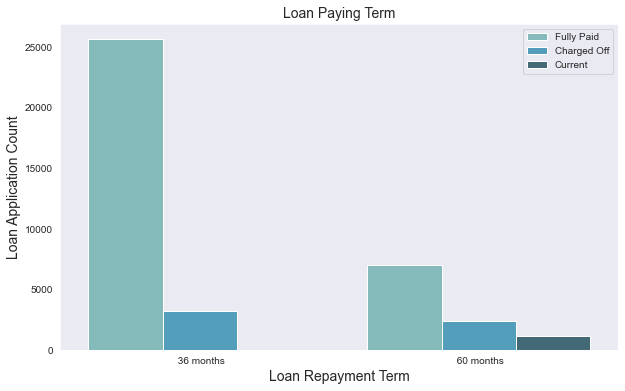

In [156]:
#Ordered Categorical Univariant Analysis on loan paying term
plt.figure(figsize=(10,6))
ax = sns.countplot(x="term",data=loan,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14)
ax.set_xlabel('Loan Repayment Term',fontsize=14)
ax.set_ylabel('Loan Application Count',fontsize=14)      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()
# Observations :
# Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
# charged off as compared to applicants who had taken loan for 36 months.

<h2>Bivariant Analysis<h2>

In [132]:
#In this part let try to analysis loan status against some important columns 
#Will try to find proportion of charged offs in some categories.

# To calculate charged off proportion, Let us create a seperate Dataset with respective interested column group by 
# and also add the loan status values proportion to total 


# Bivariate Analysis on annual income against Chargedoff_Proportion -
inc_range_vs_loan = loan.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,annual_inc_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,9,943,1189,0.199327
1,20000-40000,1514,170,7004,8688,0.174263
2,40000-60000,1729,345,9534,11608,0.148949
3,60000-80000,1024,240,6597,7861,0.130263
4,80000 +,1080,362,8531,9973,0.108292


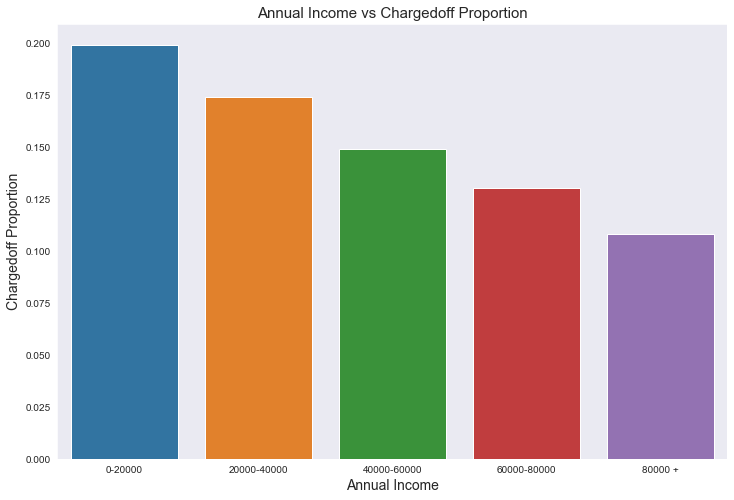

In [157]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
ax1.set_xlabel('Annual Income',fontsize=14)
plt.show()

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased.

In [134]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.
purpose_vs_loan = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,472.0,74.0,1251.0,1797.0,0.262660
10,renewable_energy,19.0,1.0,81.0,101.0,0.188119
3,educational,55.0,0.0,268.0,323.0,0.170279
9,other,629.0,126.0,3203.0,3958.0,0.158919
8,moving,91.0,7.0,479.0,577.0,0.157712
5,house,58.0,14.0,299.0,371.0,0.156334
7,medical,106.0,12.0,568.0,686.0,0.154519
2,debt_consolidation,2752.0,580.0,15165.0,18497.0,0.148781
12,vacation,53.0,6.0,322.0,381.0,0.139108
4,home_improvement,338.0,97.0,2459.0,2894.0,0.116793


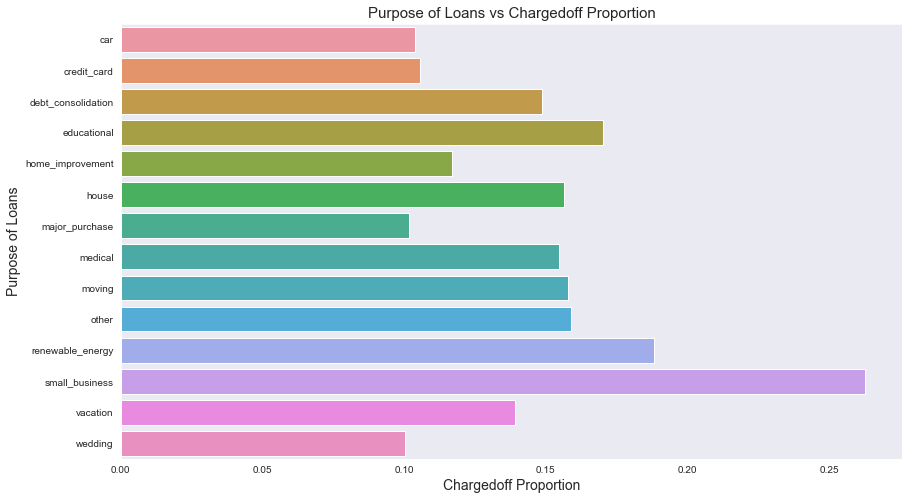

In [158]:
fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14)
ax1.set_xlabel('Chargedoff Proportion',fontsize=14)
plt.show()
# Observations:
# small Business applicants have high chnaces of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

In [136]:
# Bivariate Analysis on grade against Chargedoff_Proportion

grade_vs_loan = loan.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
6,G,99,17,190,306,0.323529
5,F,312,71,642,1025,0.304390
4,E,704,176,1906,2786,0.252692
3,D,1112,216,3916,5244,0.212052
2,C,1342,262,6411,8015,0.167436
1,B,1414,344,10167,11925,0.118574
0,A,601,40,9377,10018,0.059992


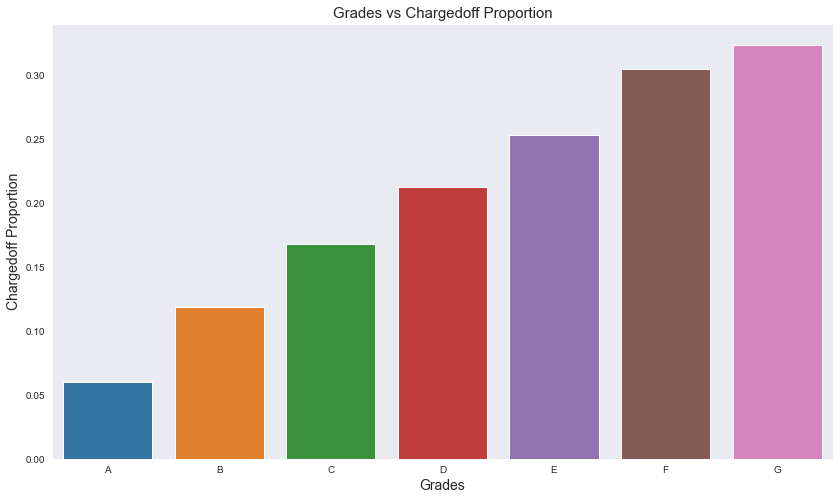

In [159]:

fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grades',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged off is increasing with grade moving from "A" towards "G"

In [138]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion

interest_vs_loan = loan.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Current'] + interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

loan_status,int_rate_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
3,16 +,1250,351,3317,4918,0.254168
2,12.5-16,1995,329,9354,11678,0.170834
1,10-13,1224,269,8083,9576,0.127820
0,0-10,825,77,11403,12305,0.067046


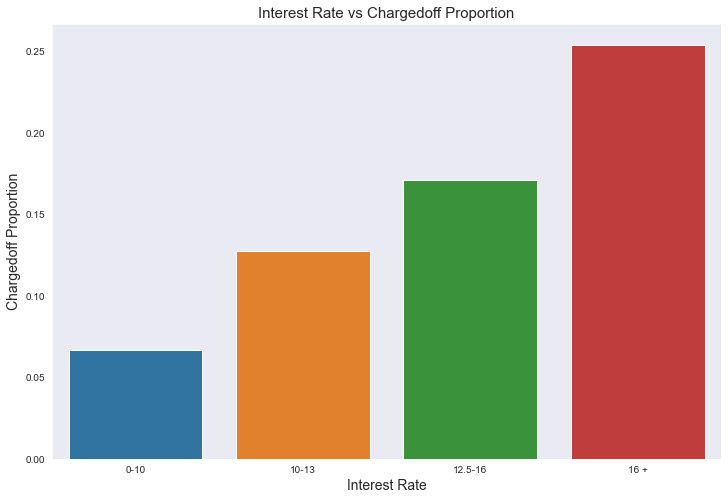

In [160]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

In [139]:
# Bivariate Analysis on employment length against Chargedoff_Proportion

emplen_vs_loan = loan.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Current'] + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,emp_length,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0,227,42,801,1070,0.212150
10,10,1316,386,7038,8740,0.150572
7,7,262,62,1435,1759,0.148948
1,1,1090,143,6533,7766,0.140355
5,5,456,87,2712,3255,0.140092
8,8,203,43,1216,1462,0.138851
6,6,305,58,1846,2209,0.138072
3,3,551,82,3426,4059,0.135748
4,4,456,94,2860,3410,0.133724
2,2,561,97,3684,4342,0.129203


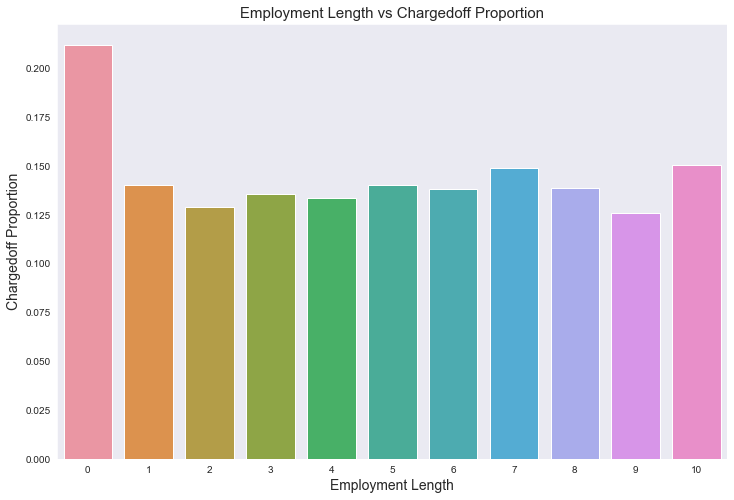

In [162]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplen_vs_loan)
ax1.set_xlabel('Employment Length',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

# Observations:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# Rest of the applicants have more or less same chnaces of getting charged off.

<h2> Bivariant Analysis using Boxplot <h2>

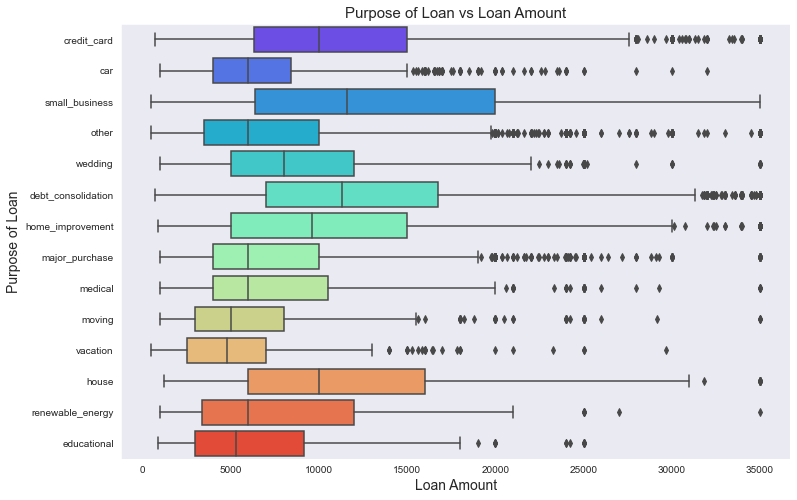

In [163]:
#Bivariate Analysis - Puprose of loan vs Loan amount

plt.figure(figsize=(12,8))
ax = sns.boxplot(y='purpose', x='loan_amnt', data =loan,palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15)
ax.set_ylabel('Purpose of Loan',fontsize=14)
ax.set_xlabel('Loan Amount',fontsize=14)
plt.show()
# Observations:
# Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.


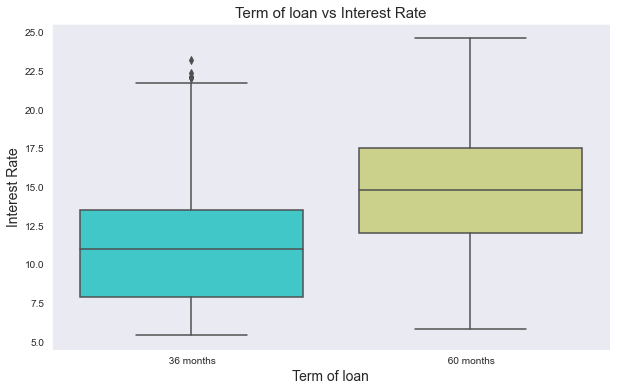

In [164]:
# Bivariate Analysis - Term of loan vs Interest Rate
plt.figure(figsize=(10,6))
ax = sns.boxplot(y='int_rate', x='term', data =loan,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15)
ax.set_ylabel('Interest Rate',fontsize=14)
ax.set_xlabel('Term of loan',fontsize=14)
plt.show()
# Observations:
# It is clear that avearge intrest rate is higher for 60 months loan term.
# Most of the loans issued for longer term had higher intrest rates for repayement.

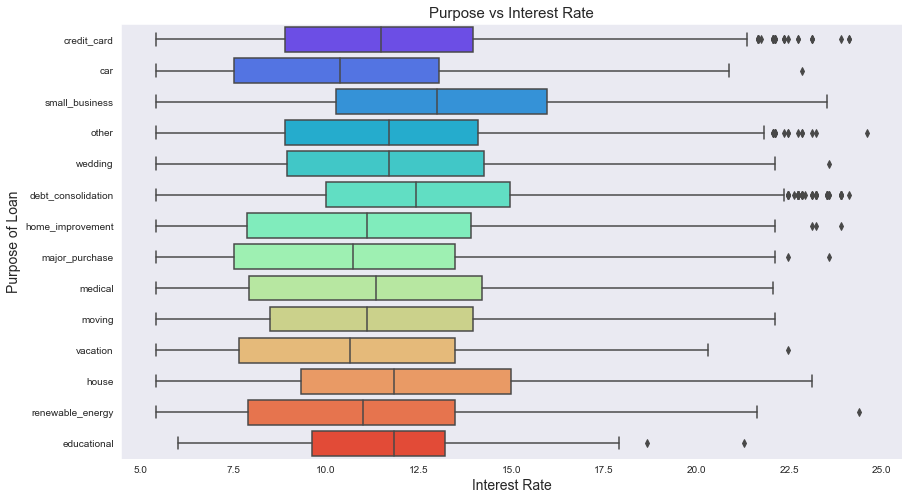

In [165]:
# Bivariate Analysis - Purpose vs Interest Rate
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='int_rate', y='purpose', data =loan,palette='rainbow')
ax.set_title('Purpose vs Interest Rate',fontsize=15)
ax.set_xlabel('Interest Rate',fontsize=14)
ax.set_ylabel('Purpose of Loan',fontsize=14)
plt.show()
# Observations:
# It is clear that avearge intrest rate is highest for small business purpose.
# Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.


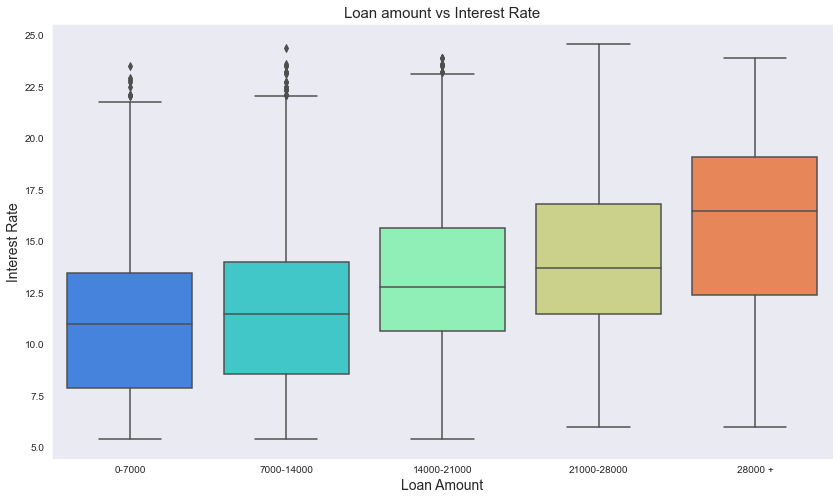

In [166]:
# Bivariate Analysis - Loan Amount vs Interest Rate
plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='loan_amnt_cats', data =loan,palette='rainbow')
ax.set_title('Loan amount vs Interest Rate',fontsize=15)
ax.set_ylabel('Interest Rate',fontsize=14)
ax.set_xlabel('Loan Amount',fontsize=14)
plt.show()
# Observations:
# It is clear that intrest rate is increasing with loan amount increase.

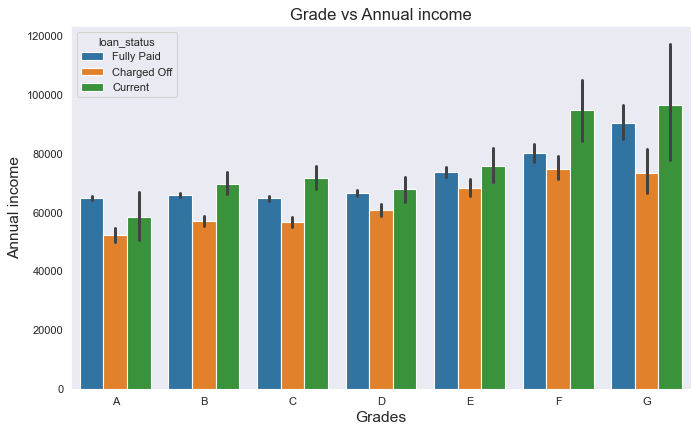

In [167]:
# Bivariate analysis
# BarPlot to show variation of annual income across grade for every loan status.

plt.figure(figsize=(10,6), dpi=80, edgecolor='k')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=loan, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=15)
ax.set_ylabel('Annual income',fontsize=14)
ax.set_xlabel('Grades',fontsize=14)
plt.show()
# Observations:
# From this we can conclude that the ones getting 'charged off' have lower annual incomes than the ones 
# who'paid fully' for each and every grade (i.e. at same interest range)